In [1]:
from keras import layers
from keras import models
import os

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Configuramos el modelo para el training;

In [4]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Using <code>ImageDataGenerator</code> para leer las imágeenes de los directorios:

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) # reescalar las imagenes por 1/255
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
base_dir = '/home/dsc/tfm_data/spanish_food_images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [7]:
train_dir

'/home/dsc/tfm_data/spanish_food_images/train'

In [8]:
train_generator =train_datagen.flow_from_directory(
        train_dir, # directorio objetivo
        target_size=(150,150), # rescalamos las imagenes a 150 x 150
        batch_size=20,
        class_mode='categorical' # hemos usado binary_crossentropy, por lo que necesitamos etiquetas binary
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150), 
        batch_size=20,
        class_mode='categorical'
)


Found 2000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data_batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data_batch shape: (20, 150, 150, 3)
labels batch shape: (20, 4)


Visualizamos las etiquetas asignadas a cada plato:

In [10]:
train_generator.class_indices

{'bravas': 0, 'croquetas': 1, 'paella': 2, 'tortilla': 3}

In [11]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=50,
    epochs=30,
    validation_data=validation_generator, 
    validation_steps=25)

/home/dsc/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
50/50 [==============================] - 30s 572ms/step - loss: 1.3848 - acc: 0.3129 - val_loss: 1.1737 - val_acc: 0.5020
Epoch 2/30
50/50 [==============================] - 27s 533ms/step - loss: 1.2125 - acc: 0.4502 - val_loss: 1.0980 - val_acc: 0.5180
Epoch 3/30
50/50 [==============================] - 32s 634ms/step - loss: 1.0832 - acc: 0.5331 - val_loss: 0.9586 - val_acc: 0.5760
Epoch 4/30
50/50 [==============================] - 31s 610ms/step - loss: 0.9634 - acc: 0.5711 - val_loss: 0.9080 - val_acc: 0.6160
Epoch 5/30
50/50 [==============================] - 31s 618ms/step - loss: 0.8894 - acc: 0.6077 - val_loss: 0.9082 - val_acc: 0.5900
Epoch 6/30
50/50 [==============================] - 31s 623ms/step - loss: 0.9082 - acc: 0.6062 - val_loss: 0.9298 - val_acc: 0.6040
Epoch 7/30
50/50 [==============================] - 30s 604ms/step - loss: 0.7915 - acc: 0.6619 - val_loss: 0.8667 - val_acc: 0.6300
Epoch 8/30
50/50 [==============================] - 31s 613ms/step - 

In [12]:
!pwd

/home/dsc/TFM_food_recognition


In [13]:
model.save('multi_class_4food.h5')

In [14]:
import matplotlib.pyplot as plt

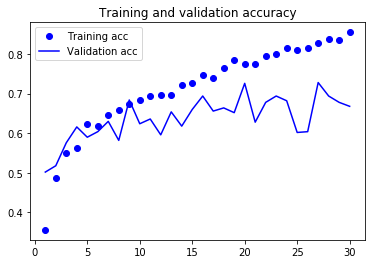

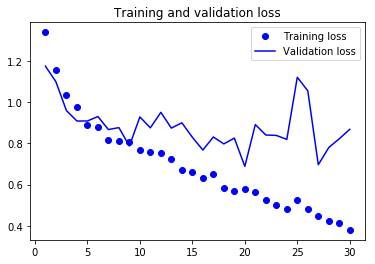

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
val_acc

[0.5019999742507935,
 0.5180000066757202,
 0.5759999752044678,
 0.6159999966621399,
 0.5899999737739563,
 0.6039999723434448,
 0.6299999952316284,
 0.5820000171661377,
 0.6840000152587891,
 0.6240000128746033,
 0.6359999775886536,
 0.5960000157356262,
 0.6539999842643738,
 0.6179999709129333,
 0.6600000262260437,
 0.6940000057220459,
 0.656000018119812,
 0.6639999747276306,
 0.6520000100135803,
 0.7260000109672546,
 0.628000020980835,
 0.6779999732971191,
 0.6940000057220459,
 0.6819999814033508,
 0.6019999980926514,
 0.6039999723434448,
 0.7279999852180481,
 0.6940000057220459,
 0.6779999732971191,
 0.6679999828338623]

### Data Augmentation: 

In [17]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [19]:
from keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [21]:
# Validation data no se realiza la transoformación de las imágenes:
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='categorical')

Found 2000 images belonging to 4 classes.


In [23]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='categorical')

Found 1000 images belonging to 4 classes.


In [24]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=50,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=25)

/home/dsc/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
50/50 [==============================] - 28s 557ms/step - loss: 1.3830 - acc: 0.2842 - val_loss: 1.2529 - val_acc: 0.4780
Epoch 2/100
50/50 [==============================] - 28s 560ms/step - loss: 1.2917 - acc: 0.3772 - val_loss: 1.0944 - val_acc: 0.5180
Epoch 3/100
50/50 [==============================] - 28s 558ms/step - loss: 1.1699 - acc: 0.4652 - val_loss: 1.0361 - val_acc: 0.5280
Epoch 4/100
50/50 [==============================] - 31s 622ms/step - loss: 1.0207 - acc: 0.5721 - val_loss: 1.7413 - val_acc: 0.3080
Epoch 5/100
50/50 [==============================] - 32s 640ms/step - loss: 1.0710 - acc: 0.5143 - val_loss: 1.1043 - val_acc: 0.5200
Epoch 6/100
50/50 [==============================] - 32s 633ms/step - loss: 1.0122 - acc: 0.5272 - val_loss: 0.9363 - val_acc: 0.6000
Epoch 7/100
50/50 [==============================] - 32s 629ms/step - loss: 0.9957 - acc: 0.5757 - val_loss: 0.9872 - val_acc: 0.5860
Epoch 8/100
50/50 [==============================] - 32s 640ms

Epoch 62/100
50/50 [==============================] - 32s 633ms/step - loss: 0.6231 - acc: 0.7589 - val_loss: 0.8454 - val_acc: 0.6840
Epoch 63/100
50/50 [==============================] - 32s 632ms/step - loss: 0.6129 - acc: 0.7398 - val_loss: 0.9054 - val_acc: 0.6700
Epoch 64/100
50/50 [==============================] - 32s 642ms/step - loss: 0.6593 - acc: 0.7289 - val_loss: 0.7422 - val_acc: 0.7380
Epoch 65/100
50/50 [==============================] - 32s 637ms/step - loss: 0.5286 - acc: 0.7980 - val_loss: 0.5578 - val_acc: 0.7680
Epoch 66/100
50/50 [==============================] - 32s 634ms/step - loss: 0.6304 - acc: 0.7657 - val_loss: 0.6384 - val_acc: 0.7520
Epoch 67/100
50/50 [==============================] - 32s 634ms/step - loss: 0.5900 - acc: 0.7872 - val_loss: 0.6816 - val_acc: 0.7300
Epoch 68/100
50/50 [==============================] - 32s 636ms/step - loss: 0.6049 - acc: 0.7791 - val_loss: 0.5761 - val_acc: 0.7840
Epoch 69/100
50/50 [==============================] - 3

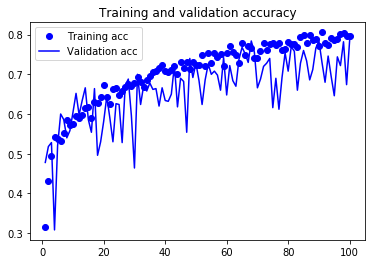

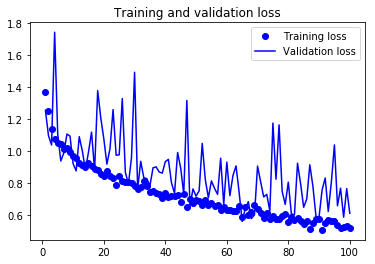

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
model.save('multi_class_4food_augment.h5')

In [32]:
Y_pred = classifier.predict_generator(validation_generator, 1000 // 20+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
matrix = cm(validation_generator.classes, y_pred)
print(matrix)
print('Classification Report')

#print(cr(training_set.classes, y_pred))

NameError: name 'classifier' is not defined